In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logistic_regression as logic
import sys
sys.path.append('..')
from code_misc.utils import MyUtils

In [2]:
data_set = 'ionosphere'

print(data_set+'/'+'hello')

ionosphere/hello


In [3]:
# READ in data
df_X_train = pd.read_csv(data_set+'/'+'X_train.csv', header=None)
df_y_train = pd.read_csv(data_set+'/'+'y_train.csv', header=None)
df_X_test = pd.read_csv(data_set+'/'+'X_test.csv', header=None)
df_y_test = pd.read_csv(data_set+'/'+'y_test.csv', header=None)

# save in numpy arrays
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()

# get training set size
n_train = X_train.shape[0]

# normalize all features to [0,1] or [-1,1]
if data_set == 'ionosphere':
    X_all = MyUtils.normalize_neg1_pos1(np.concatenate((X_train, X_test), axis=0))


X_train = X_all[:n_train]
X_test = X_all[n_train:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)

(280, 34)
(280, 1)
(71, 34)
(71, 1)


In [4]:
# build the model
log = logic.LogisticRegression()

In [8]:
# train the model
#log.fit(X_train, y_train, lam = 0, eta = 0.1, iterations = 50000, SGD = False, mini_batch_size = 20, degree = 3)
log.fit(X_train, y_train, lam = 0, eta = 0.1, iterations = 50000, SGD = True, mini_batch_size = 20, degree = 3)

In [9]:
print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])

misclassfied percentage from training:  0.05714285714285714
misclassfied percentage from validation:  0.08450704225352113


In [10]:
# Stochastic gradient descent parameter tuning
# Will tune params in the following order
# 1) degree space = 1
    # a. lambda vals
    # b. eta 
    # c. epochs
    # d. minibatch
# 2) degree space = 2
    # a. lambda vals
    # b. eta 
    # c. epochs
    # d. minibatch
# 3) degree space = 3
    # a. lambda vals
    # b. eta 
    # c. epochs
    # d. minibatch
# 4) degree space = 4
    # a. lambda vals
    # b. eta 
    # c. epochs
    # d. minibatch

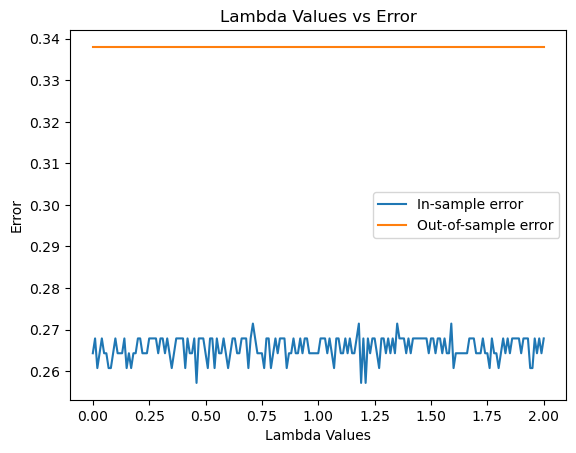

In [14]:
# 1a -> lambda vals

error_arr1 = np.zeros(201)
error_arr2 = np.zeros(201)
lam_arr = np.arange(0, 2.01, 0.01)

for i in range(201):

    # get new w vector with new lam value  
    # holding degree space, eta, and epochs constant 
    # with degree space = 1, eta = 0.01, iterations = 50000, mini_batch_size = 20, degree = 1
    # each call to fit() generates new permutation of X and y
    log.fit(X_train, y_train, lam = i/100, eta = 0.1, iterations = 50000, SGD = True, mini_batch_size = 20, degree = 1)
    
    error_arr1[i] = log.error(X_train, y_train)/X_train.shape[0]
    error_arr2[i] = log.error(X_test, y_test)/X_test.shape[0]

#print(lam_arr)
#print(error_arr)
    
plt.plot(lam_arr, error_arr1, label = "In-sample error")
plt.plot(lam_arr, error_arr2, label = "Out-of-sample error")
plt.xlabel('Lambda Values')
plt.ylabel('Error')
plt.title('Lambda Values vs Error')
#plt.xlim(0, 0.3)
#plt.ylim(0, 50)
plt.legend()
plt.show()